In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('./data_galaxy_zoo/training_solutions_rev1.csv')

In [3]:
df

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,...,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,...,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,...,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


In [4]:
df2 = df.iloc[:,:4]

In [5]:
df2

,GalaxyID,Class1.1,Class1.2,Class1.3
0,100008,0.383147,0.616853,0.000000
1,100023,0.327001,0.663777,0.009222
2,100053,0.765717,0.177352,0.056931
3,100078,0.693377,0.238564,0.068059
4,100090,0.933839,0.000000,0.066161
...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000
61574,999950,0.901216,0.098784,0.000000
61575,999958,0.202841,0.777376,0.019783
61576,999964,0.091000,0.909000,0.000000


In [6]:
df2['Class'] = df2.iloc[:,1:4].idxmax(axis = 1)
df2

,GalaxyID,Class1.1,Class1.2,Class1.3,Class
0,100008,0.383147,0.616853,0.000000,Class1.2
1,100023,0.327001,0.663777,0.009222,Class1.2
2,100053,0.765717,0.177352,0.056931,Class1.1
3,100078,0.693377,0.238564,0.068059,Class1.1
4,100090,0.933839,0.000000,0.066161,Class1.1
...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,Class1.1
61574,999950,0.901216,0.098784,0.000000,Class1.1
61575,999958,0.202841,0.777376,0.019783,Class1.2
61576,999964,0.091000,0.909000,0.000000,Class1.2


In [7]:
class1 = df2.loc[(df2['Class'] == 'Class1.1')].sort_values('Class1.1', ascending=False)
class1

,GalaxyID,Class1.1,Class1.2,Class1.3,Class
58228,950850,1.000000,0.000000,0.000000,Class1.1
19719,389459,1.000000,0.000000,0.000000,Class1.1
15041,322803,1.000000,0.000000,0.000000,Class1.1
14929,321044,1.000000,0.000000,0.000000,Class1.1
30195,542697,1.000000,0.000000,0.000000,Class1.1
...,...,...,...,...,...
61,100938,0.384686,0.238401,0.376913,Class1.1
22483,428697,0.383617,0.287934,0.328449,Class1.1
42479,719893,0.374628,0.260064,0.365309,Class1.1
60181,979489,0.373769,0.316534,0.309697,Class1.1


In [8]:
class2 = df2.loc[(df2['Class'] == 'Class1.2')].sort_values('Class1.2', ascending=False)
class2

,GalaxyID,Class1.1,Class1.2,Class1.3,Class
8787,229602,0.000000,1.000000,0.000000,Class1.2
37152,642684,0.000000,1.000000,0.000000,Class1.2
8743,228944,0.000000,1.000000,0.000000,Class1.2
24919,463959,0.000000,1.000000,0.000000,Class1.2
37330,645519,0.000000,1.000000,0.000000,Class1.2
...,...,...,...,...,...
33163,586256,0.336000,0.396000,0.268000,Class1.2
16044,337325,0.383657,0.388412,0.227931,Class1.2
10916,262021,0.293000,0.357000,0.350000,Class1.2
39725,678893,0.291513,0.354642,0.353845,Class1.2


In [9]:
class3 = df2.loc[(df2['Class'] == 'Class1.3')].sort_values('Class1.3', ascending=False)
class3

,GalaxyID,Class1.1,Class1.2,Class1.3,Class
17392,356310,0.064853,0.000000,0.935147,Class1.3
16618,345209,0.123542,0.000000,0.876458,Class1.3
58526,955102,0.172172,0.034034,0.793794,Class1.3
1791,126783,0.178000,0.044000,0.778000,Class1.3
61345,996629,0.290021,0.000000,0.709979,Class1.3
28337,515600,0.227000,0.068000,0.705000,Class1.3
46887,783039,0.279000,0.023000,0.698000,Class1.3
36732,636777,0.274000,0.042000,0.684000,Class1.3
23081,437063,0.319300,0.000000,0.680700,Class1.3
58550,955433,0.260000,0.060000,0.680000,Class1.3


In [10]:
sample_class_1 = class1.head(100).iloc[:,:1]
sample_class_2 = class2.head(100).iloc[:,:1]
sample_class_3 = class3.head(100).iloc[:,:1]

In [11]:
sample_class_1.head()

,GalaxyID
58228,950850
19719,389459
15041,322803
14929,321044
30195,542697


In [12]:
import os
if not os.path.exists('./data_galaxy_zoo/images_training_rev1/sample_class_1'):
    os.makedirs('./data_galaxy_zoo/images_training_rev1/sample_class_1')
if not os.path.exists('./data_galaxy_zoo/images_training_rev1/sample_class_2'):
    os.makedirs('./data_galaxy_zoo/images_training_rev1/sample_class_2')
if not os.path.exists('./data_galaxy_zoo/images_training_rev1/sample_class_3'):
    os.makedirs('./data_galaxy_zoo/images_training_rev1/sample_class_3')

In [13]:
for row in sample_class_1['GalaxyID']:
    path_img = f"./data_galaxy_zoo/images_training_rev1/{row}.jpg"
    print(path_img)

./data_galaxy_zoo/images_training_rev1/950850.jpg
./data_galaxy_zoo/images_training_rev1/389459.jpg
./data_galaxy_zoo/images_training_rev1/322803.jpg
./data_galaxy_zoo/images_training_rev1/321044.jpg
./data_galaxy_zoo/images_training_rev1/542697.jpg
./data_galaxy_zoo/images_training_rev1/217826.jpg
./data_galaxy_zoo/images_training_rev1/217984.jpg
./data_galaxy_zoo/images_training_rev1/218281.jpg
./data_galaxy_zoo/images_training_rev1/803926.jpg
./data_galaxy_zoo/images_training_rev1/483054.jpg
./data_galaxy_zoo/images_training_rev1/317781.jpg
./data_galaxy_zoo/images_training_rev1/105447.jpg
./data_galaxy_zoo/images_training_rev1/677201.jpg
./data_galaxy_zoo/images_training_rev1/660833.jpg
./data_galaxy_zoo/images_training_rev1/797160.jpg
./data_galaxy_zoo/images_training_rev1/662983.jpg
./data_galaxy_zoo/images_training_rev1/310222.jpg
./data_galaxy_zoo/images_training_rev1/786715.jpg
./data_galaxy_zoo/images_training_rev1/232957.jpg
./data_galaxy_zoo/images_training_rev1/782350.jpg


In [14]:
import shutil
for row in sample_class_1['GalaxyID']:
    path_img = f"./data_galaxy_zoo/images_training_rev1/{row}.jpg"
    filePath = shutil.copy(path_img, './data_galaxy_zoo/images_training_rev1/sample_class_1')


In [15]:
import shutil
for row in sample_class_2['GalaxyID']:
    path_img = f"./data_galaxy_zoo/images_training_rev1/{row}.jpg"
    filePath = shutil.copy(path_img, './data_galaxy_zoo/images_training_rev1/sample_class_2')


In [16]:
import shutil
for row in sample_class_3['GalaxyID']:
    path_img = f"./data_galaxy_zoo/images_training_rev1/{row}.jpg"
    filePath = shutil.copy(path_img, './data_galaxy_zoo/images_training_rev1/sample_class_3')


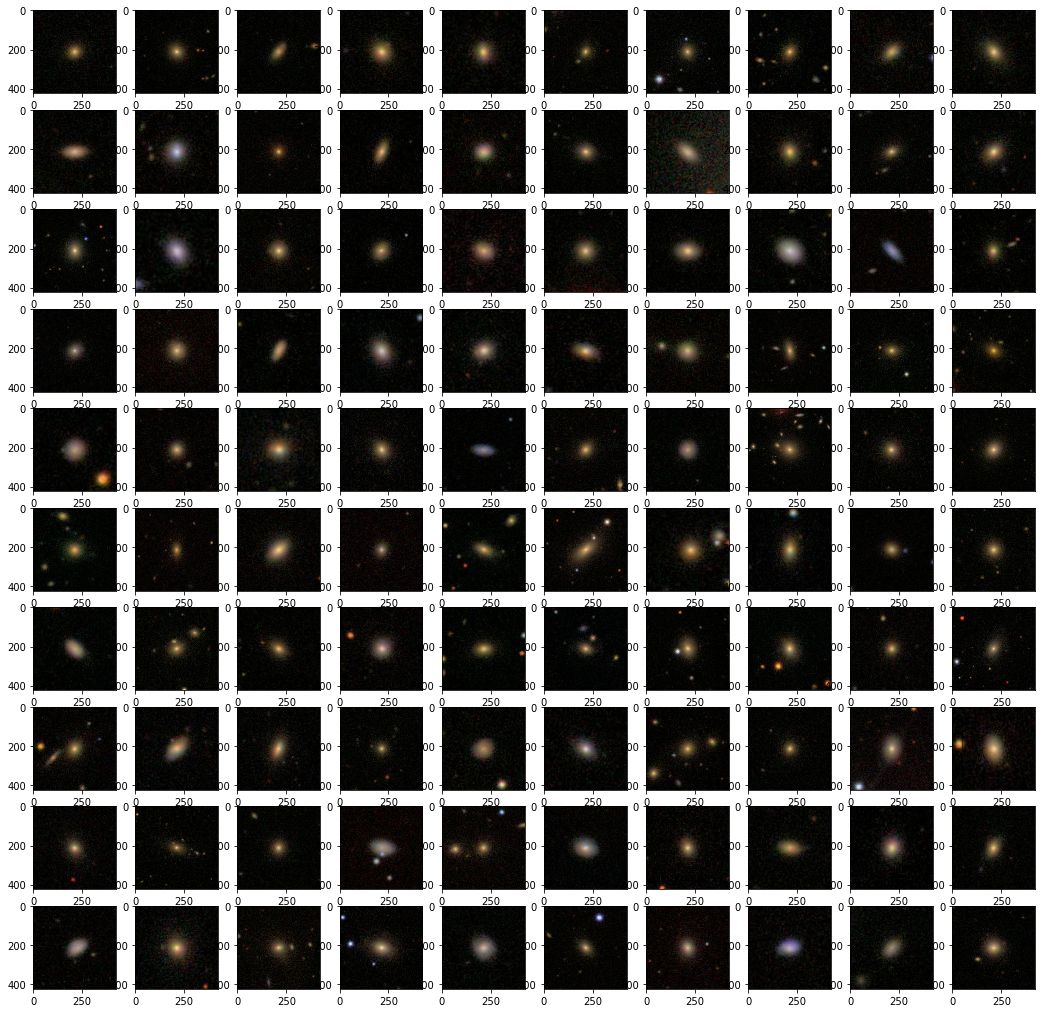

In [17]:
fig, axs = plt.subplots(10, 10, figsize=(18, 18))
for x in range(10):
    for y in range(10):
        img = cv2.cvtColor(cv2.imread(f'./data_galaxy_zoo/images_training_rev1/sample_class_1/{sample_class_1.iloc[10*x+y,0]}.jpg'),cv2.COLOR_BGR2RGB)
        axs[x,y].imshow(img)

In [ ]:
fig, axs = plt.subplots(10, 10, figsize=(18, 18))
for x in range(10):
    for y in range(10):
        img = cv2.cvtColor(cv2.imread(f'./data_galaxy_zoo/images_training_rev1/sample_class_2/{sample_class_2.iloc[10*x+y,0]}.jpg'),cv2.COLOR_BGR2RGB)
        axs[x,y].imshow(img)

In [ ]:
fig, axs = plt.subplots(10, 10, figsize=(18, 18))
for x in range(10):
    for y in range(10):
        img = cv2.cvtColor(cv2.imread(f'./data_galaxy_zoo/images_training_rev1/sample_class_3/{sample_class_3.iloc[10*x+y,0]}.jpg'),cv2.COLOR_BGR2RGB)
        axs[x,y].imshow(img)

In [ ]:
SIZE = 5
fig, axs = plt.subplots(SIZE, SIZE, figsize=(18, 18))
i = 0
for x in range(SIZE):
    for y in range(SIZE):
        img = cv2.imread(f'./data_galaxy_zoo/images_training_rev1/{sample_class_1.iloc[i,0]}.jpg')
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        
        axs[x,y].imshow(thresh)
        i += 1

In [ ]:
SIZE = 5
fig, axs = plt.subplots(SIZE, SIZE, figsize=(18, 18))
i = 0
for x in range(SIZE):
    for y in range(SIZE):
        img = cv2.imread(f'./data_galaxy_zoo/images_training_rev1/{sample_class_2.iloc[i,0]}.jpg')
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        
        axs[x,y].imshow(thresh)
        i += 1

In [ ]:
SIZE = 5
fig, axs = plt.subplots(SIZE, SIZE, figsize=(18, 18))
i = 0
for x in range(SIZE):
    for y in range(SIZE):
        img = cv2.imread(f'./data_galaxy_zoo/images_training_rev1/{sample_class_3.iloc[i,0]}.jpg')
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        
        axs[x,y].imshow(thresh)
        i += 1

In [ ]:
image = cv2.imread('./data_galaxy_zoo/images_training_rev1/sample_class_2/120632.jpg')


# Remove noise

height = 220

width = 220

dim = (width, height)


# Setting dim of the resize

res = cv2.resize(image, dim, interpolation=cv2.INTER_LINEAR)


# Blur : Gaussian

blur = cv2.GaussianBlur(res, (5, 5), 0)


# Segmentation

gray = cv2.cvtColor(blur, cv2.COLOR_RGB2GRAY)

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)


# Marker labelling

ret, markers = cv2.connectedComponents(thresh)


# Add one to all labels so that sure background is not 0, but 1

#markers = markers + 1


# Now, mark the region of unknown with zero

#markers[unknown == 255] = 0


markers = cv2.watershed(blur, markers)

#blur[markers == -1] = [255, 0, 0]


center = markers[106, 106]


masque = np.array(markers)

blur2 = blur.copy()

masque[:,:] = 0

masque[markers == center] = 255


kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,30))

#masque = cv2.dilate(masque.astype(np.uint8), kernel, iterations = 1)

masque = cv2.blur(masque.astype(float), (5,5))


for i in range(3):

    blur2[:,:,i] = (masque*blur[:,:,i]/255.0).astype(np.uint8)




plt.figure(figsize=(10,10))


plt.subplot(121), plt.imshow(image), plt.title('Original')

plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(blur2), plt.title('Sans les parasite')

plt.xticks([]), plt.yticks([])

In [ ]:
img = cv2.imread('./data_galaxy_zoo/images_training_rev1/sample_class_2/120632.jpg')
img.shape[1]/2

In [ ]:
if not os.path.exists('./data_galaxy_zoo/images_training_rev1/crop_class_1'):
    os.makedirs('./data_galaxy_zoo/images_training_rev1/crop_class_1')
if not os.path.exists('./data_galaxy_zoo/images_training_rev1/crop_class_2'):
    os.makedirs('./data_galaxy_zoo/images_training_rev1/crop_class_2')
if not os.path.exists('./data_galaxy_zoo/images_training_rev1/crop_class_3'):
    os.makedirs('./data_galaxy_zoo/images_training_rev1/crop_class_3')

In [ ]:
def crop_image(dossier_class,id_image):   
    img = cv2.imread(f'./data_galaxy_zoo/images_training_rev1/{id_image}.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    ret, thresh = cv2.threshold(img_grey, thresh=40, maxval=255, type=0)
    img, contours, hierarchy = cv2.findContours(thresh, 1, 2)

    max_numb = 0
    for contour in contours:
        dist = cv2.pointPolygonTest(contour,(212,212),True)
        if dist >= 0:# si contient le point central x y
            print(dist)

            cnt = contour
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(img, [box], 0, (0, 0, 255), 2)

    x,y,w,h = cv2.boundingRect(cnt)
    m = max([x,y,w,h])
    mi = min([x,y,w,h])
    d = int((m - mi)/2)
    n = int(m/2)

    print([x,y,w,h])
    x = m
    y = m
    x -= d
    y -= d
    w = m
    h = m
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    plt.imshow(img)
    plt.xticks([])
    plt.yticks([]);
    
    img = cv2.imread(f'data_galaxy_zoo/images_training_rev1/{id_image}.jpg')
    img_crop = img[y:y+h, x:x+w]
    img_ok = cv2.cvtColor(img_crop, cv2.COLOR_BGR2RGB)
    plt.imshow(img_ok);
    plt.xticks([])
    plt.yticks([])
    print(img_crop.shape)
    cv2.imwrite(f'data_galaxy_zoo/images_training_rev1/{dossier_class}/{id_image}.jpg', img_crop)

In [ ]:
for id_image in sample_class_1['GalaxyID']: 
    print(id_image)
    dossier_class = 'crop_class_1'
    crop_image(dossier_class, id_image)


In [ ]:
img = cv2.cvtColor(cv2.imread('data_galaxy_zoo/images_training_rev1/101997.jpg'), cv2.COLOR_BGR2RGB)
img_crop = img[y:y+h, x:x+w]
plt.imshow(img_crop);
plt.xticks([])
plt.yticks([])
print(img_crop.shape)
